#### Name: Mostafa Ayman Hegazy
#### Email: m.hegazy@innopolis.university

# Machine Learning $1^{st}$ assignment.

## Task 1 Linear/Polynomial regression

#### Generate the dataset

In [1]:
import numpy as np

def Generate_data(x,samples):
    return np.sin(x) * np.sqrt(x) + 0.8 * rnd.randn(samples)

samples_no  =  50
rnd  =  np.random.RandomState(42)
x_train =  rnd.rand(samples_no) * 16
y_train  =  Generate_data(x_train, samples_no)

Generate the Test Data

In [2]:
x_test = np.linspace(0,20)
y_test = Generate_data(x_test, samples_no)

#### $ 1^{st} $ Plot the data

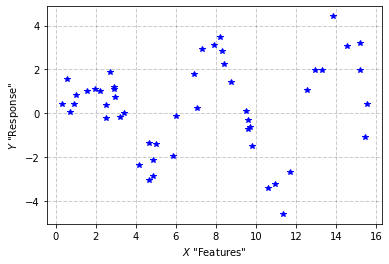

In [3]:
from matplotlib.pyplot import *
import matplotlib.pyplot as plt

plt.plot(x_train, y_train,'*', color = 'blue')
grid(color='black', linestyle='--', linewidth=1.0, alpha = 0.2)
grid(True)
ylabel(r'${Y}$ "Response"')
xlabel(r'${X}$ "Features"')

show()

#### $2^{nd}$ Build Linear Regression Model

Reshape the x_train vector for the regressor

In [4]:
x_train = x_train[..., np.newaxis]
x_test = x_test[..., np.newaxis]
x_train.shape

(50, 1)

Build the Regressor and fit it to the training data

In [5]:
from sklearn.linear_model import LinearRegression

regressor = LinearRegression()
regressor.fit(x_train, y_train)

print(regressor.intercept_)
print(regressor.coef_)

-0.02023749718689105
[0.04315794]


Predict the new y values from the model

In [6]:
y_pred = regressor.predict(x_test)

#### $3^{rd}$ Plotting the original data vs predicted data

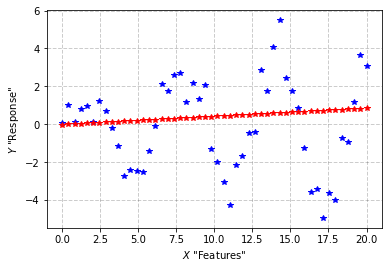

In [7]:
from matplotlib.pyplot import *
import matplotlib.pyplot as plt

plt.plot(x_test, y_test,'*', color = 'blue')
plt.plot(x_test, y_pred,'*', color = 'red')
grid(color='black', linestyle='--', linewidth=1.0, alpha = 0.2)
grid(True)
ylabel(r'${Y}$ "Response"')
xlabel(r'${X}$ "Features"')

show()

Measure the performance of the Linear Model

In [8]:
from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 2.009606266813684
Mean Squared Error: 5.9812806492607695
Root Mean Squared Error: 2.445665686323617


#### $4^{th}$ Polynomial Regression

In [9]:
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import cross_val_score

#### Let's try 3 sets of degrees 

    1. Less than 7
    2. More than 6 less than 12
    3. More than 11 Till 20

In [10]:
degrees = np.array([[1 ,2 ,3 ,4 ,6] , [7, 8, 9, 10, 11], [12, 13, 14, 15, 20]])
deg_rows = degrees.shape[1]
deg_columns = degrees.shape[0]

##### Initialize a pipeline with the polynomial features and linear regression and Cross-validate each model and Plot the results

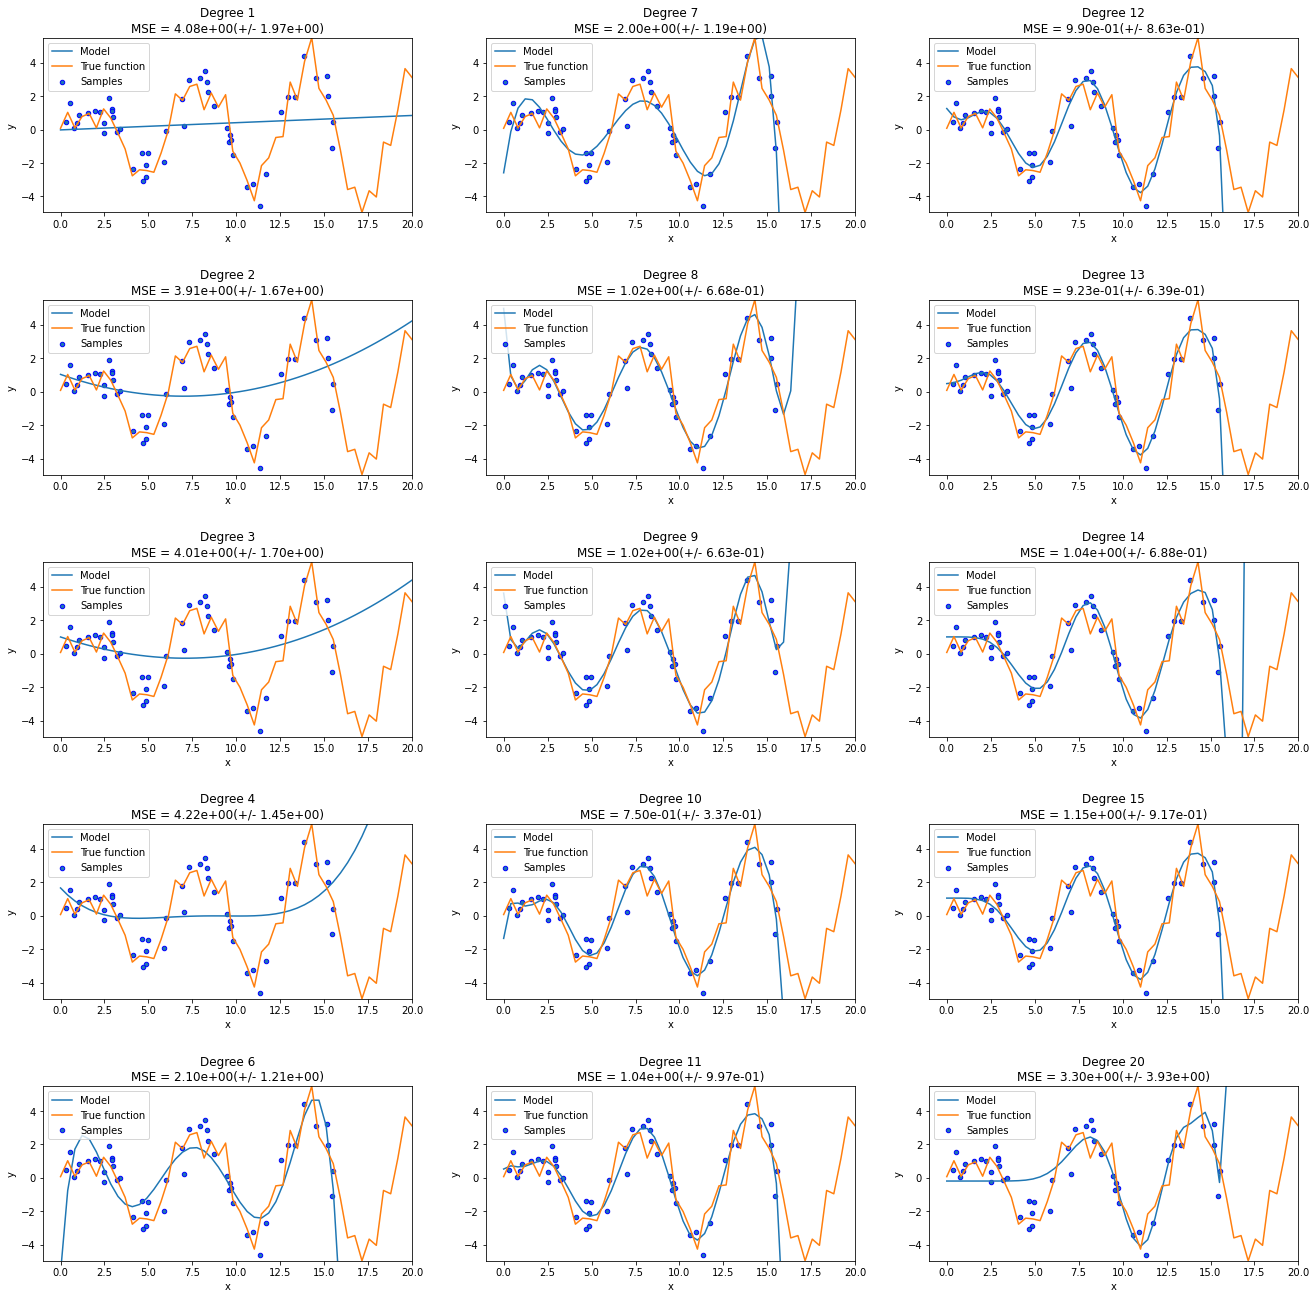

In [11]:
fig, axes = plt.subplots(nrows=deg_rows, ncols=deg_columns)
fig.set_size_inches(22.5, 22.5)

for i in range(deg_rows):
    for j in range(deg_columns):

        polynomial_features = PolynomialFeatures(degree=degrees[j,i])
        linear_regression = LinearRegression()
        pipeline = Pipeline([("polynomial_features", polynomial_features),
                             ("linear_regression", linear_regression)])
        #Fitting step
        pipeline.fit(x_train, y_train)

        # Evaluate the models using cross-validation
        scores = cross_val_score(pipeline, x_train, y_train,
                                 scoring="neg_mean_squared_error", cv=10)
        #Prediction step
        y_pred = pipeline.predict(x_test)

        # Plotting step
        axes[i,j].plot(x_test, y_pred, label="Model")
        axes[i,j].plot(x_test, y_test, label="True function")
        axes[i,j].scatter(x_train, y_train, edgecolor='b', s=20, label="Samples")
        axes[i,j].set_xlabel("x")
        axes[i,j].set_ylabel("y")
        axes[i,j].set_xlim((-1, 20))
        axes[i,j].set_ylim((min(y_test), max(y_test)))
        axes[i,j].legend(loc="best")
        axes[i,j].set_title("Degree {}\nMSE = {:.2e}(+/- {:.2e})".format(
            degrees[j,i], -scores.mean(), scores.std()))
        
fig.subplots_adjust(hspace=0.5) 
plt.show()

#### $5^{th}$ Why did i pick this model

The $10^{th}$ degree model is the best model for this data as it has the lowest cross validation error before the error starts growing up again in the larger degrees, it wouldn't be better to choose a higher degree because at the higher degrees the model will start to memorize rather than learn from the data and it will have a very high training accuracy but very poor testing accuracy.

But the very flexible model that i chose might make some problems if the testing data x-range is bigger than the training data because it might predict the out of range values in the wrong direction if the test data changes its direction

Models with smaller degree result in a high bias and don't learn enough from this particular data thus also has a poor performance

#### $6^{th}$ Apply Lasso and Ridge Regularization

In [12]:
from sklearn.linear_model import Lasso, Ridge
from sklearn.model_selection import GridSearchCV

L = Lasso()
R = Ridge()

alphas = np.logspace(-3,3,25)
alphas

array([1.00000000e-03, 1.77827941e-03, 3.16227766e-03, 5.62341325e-03,
       1.00000000e-02, 1.77827941e-02, 3.16227766e-02, 5.62341325e-02,
       1.00000000e-01, 1.77827941e-01, 3.16227766e-01, 5.62341325e-01,
       1.00000000e+00, 1.77827941e+00, 3.16227766e+00, 5.62341325e+00,
       1.00000000e+01, 1.77827941e+01, 3.16227766e+01, 5.62341325e+01,
       1.00000000e+02, 1.77827941e+02, 3.16227766e+02, 5.62341325e+02,
       1.00000000e+03])

##### Make the pipeline and use gridsearch

In [13]:
polynomial_features = PolynomialFeatures(degree=10)

param_grid_lasso = [{'lasso_regression__alpha':alphas}]
param_grid_ridge = [{'ridge_regression__alpha':alphas}]

pipeline_lasso = Pipeline([('polynomial_features', polynomial_features),
                     ('lasso_regression', L)])
pipeline_ridge = Pipeline([('polynomial_features', polynomial_features),
                     ('ridge_regression', R)])

#GridSearch
lasso_gridSearch = GridSearchCV(pipeline_lasso, param_grid_lasso, cv=10)
ridge_gridSearch = GridSearchCV(pipeline_ridge, param_grid_ridge, cv=10)

print(lasso_gridSearch, ridge_gridSearch)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('polynomial_features',
                                        PolynomialFeatures(degree=10)),
                                       ('lasso_regression', Lasso())]),
             param_grid=[{'lasso_regression__alpha': array([1.00000000e-03, 1.77827941e-03, 3.16227766e-03, 5.62341325e-03,
       1.00000000e-02, 1.77827941e-02, 3.16227766e-02, 5.62341325e-02,
       1.00000000e-01, 1.77827941e-01, 3.16227766e-01, 5.62341325e-01,
       1.00000000e+00, 1.77827941e+00, 3.16227766e+00, 5.62341325e+00,
       1.00000000e+01, 1.77827941e+01, 3.16227766e+01, 5.62341325e+01,
       1.00000000e+02, 1.77827941e+02, 3.16227766e+02, 5.62341325e+02,
       1.00000000e+03])}]) GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('polynomial_features',
                                        PolynomialFeatures(degree=10)),
                                       ('ridge_regression', Ridge())]),
             param_grid=[{'ridge_regress

Fit the gridSearch

In [14]:
import warnings
warnings.filterwarnings("ignore")

lasso_gridSearch.fit(x_train, y_train)
ridge_gridSearch.fit(x_train, y_train)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('polynomial_features',
                                        PolynomialFeatures(degree=10)),
                                       ('ridge_regression', Ridge())]),
             param_grid=[{'ridge_regression__alpha': array([1.00000000e-03, 1.77827941e-03, 3.16227766e-03, 5.62341325e-03,
       1.00000000e-02, 1.77827941e-02, 3.16227766e-02, 5.62341325e-02,
       1.00000000e-01, 1.77827941e-01, 3.16227766e-01, 5.62341325e-01,
       1.00000000e+00, 1.77827941e+00, 3.16227766e+00, 5.62341325e+00,
       1.00000000e+01, 1.77827941e+01, 3.16227766e+01, 5.62341325e+01,
       1.00000000e+02, 1.77827941e+02, 3.16227766e+02, 5.62341325e+02,
       1.00000000e+03])}])

In [15]:
best_params_lasso = lasso_gridSearch.best_params_
best_params_ridge = ridge_gridSearch.best_params_

best_alpha_lasso = best_params_lasso.get('lasso_regression__alpha')
best_alpha_ridge = best_params_ridge.get('ridge_regression__alpha')

print(best_params_lasso, best_params_ridge)

{'lasso_regression__alpha': 17.78279410038923} {'ridge_regression__alpha': 0.1778279410038923}


#### $7^{th}$ Plot the response with and without Regularization against the original data

In [16]:
L = Lasso(alpha=best_alpha_lasso)
R = Ridge(alpha=best_alpha_ridge)
regressor = LinearRegression()

In [17]:
polynomial_features = PolynomialFeatures(degree=10)

pipeline_poly = Pipeline([('polynomial_features', polynomial_features),
                     ('linear_regression', regressor)])
pipeline_lasso = Pipeline([('polynomial_features', polynomial_features),
                     ('lasso_regression', L)])
pipeline_ridge = Pipeline([('polynomial_features', polynomial_features),
                     ('ridge_regression', R)])

In [18]:
pipelines = [pipeline_poly, pipeline_lasso, pipeline_ridge]
pipelines

[Pipeline(steps=[('polynomial_features', PolynomialFeatures(degree=10)),
                 ('linear_regression', LinearRegression())]),
 Pipeline(steps=[('polynomial_features', PolynomialFeatures(degree=10)),
                 ('lasso_regression', Lasso(alpha=17.78279410038923))]),
 Pipeline(steps=[('polynomial_features', PolynomialFeatures(degree=10)),
                 ('ridge_regression', Ridge(alpha=0.1778279410038923))])]

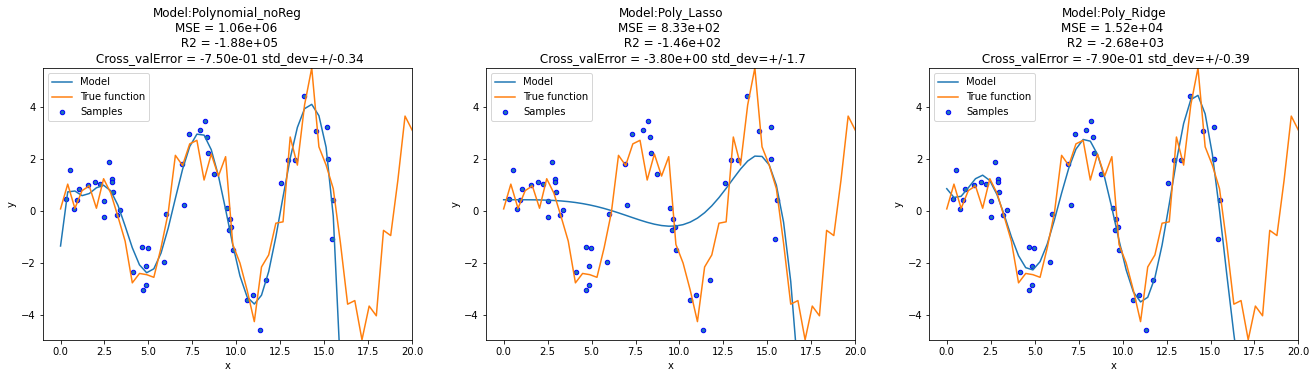

In [19]:
no_models = 3
Model_name = ['Polynomial_noReg', 'Poly_Lasso', 'Poly_Ridge']

fig, axes = plt.subplots(nrows=1, ncols=no_models)
fig.set_size_inches(22.5, 5)

for i in range(no_models):

        #Fitting step
        pipelines[i].fit(x_train, y_train)

        #Prediction step
        y_pred = pipelines[i].predict(x_test)
        
        #Cross validation error
        scores_val = cross_val_score(pipelines[i], x_train, y_train,
                                 scoring="neg_mean_squared_error", cv=10)
        
        scores = [metrics.mean_squared_error(y_test, y_pred), metrics.r2_score(y_test, y_pred)]
        
        # Plotting step
        axes[i].plot(x_test, y_pred, label="Model")
        axes[i].plot(x_test, y_test, label="True function")
        axes[i].scatter(x_train, y_train, edgecolor='b', s=20, label="Samples")
        axes[i].set_xlabel("x")
        axes[i].set_ylabel("y")
        axes[i].set_xlim((-1, 20))
        axes[i].set_ylim((min(y_test), max(y_test)))
        axes[i].legend(loc="best")
        axes[i].set_title("Model:{}\nMSE = {:.2e} \n R2 = {:.2e}\n Cross_valError = {:.2e} std_dev=+/-{:.2}".format(
            Model_name[i], scores[0], scores[1], scores_val.mean(), scores_val.std()))
         
plt.show()

#### $8^{th}$ Cross-Validation for Linear model, PolyModel with and without Regularization

In [20]:
#Add the linear regression model to the pipelines array
pipelines.append(regressor)
Model_name.append('Linear Regression')

for model, model_name in zip(pipelines, Model_name):
    #Fitting step
    model.fit(x_train, y_train)

    #Prediction step
    y_pred = model.predict(x_test)

    #Cross validation error
    scores_val = cross_val_score(model, x_train, y_train,
                             scoring="neg_mean_squared_error", cv=10)
    #print the results
    print("Model:{} MSE = {:.2e} std_dev=+/-{:.2}\n".format(
            model_name, -scores_val.mean(), scores_val.std()))

Model:Polynomial_noReg MSE = 7.50e-01 std_dev=+/-0.34

Model:Poly_Lasso MSE = 3.80e+00 std_dev=+/-1.7

Model:Poly_Ridge MSE = 7.90e-01 std_dev=+/-0.39

Model:Linear Regression MSE = 4.08e+00 std_dev=+/-2.0



## Task 3 Logistic Regression

#### $1^{st}$ Read the data and names, make a csv File

In [21]:
import csv

data = []
with open('spambase.data','r') as datafile:
    reader = csv.reader(datafile, delimiter=',')
    for r in reader:
        data.append(r)
        
all_strings = []
with open('spambase.names','r') as datafile:
    reader = csv.reader(datafile, delimiter=':')
    for r in reader:
        try:
            all_strings.append(r[0])
        except:
            pass
        
names = all_strings[30:]
names.append('y')

with open('Spamdata.csv', 'w', newline='') as outfile:
    writer = csv.writer(outfile)
    writer.writerow(names)
    for r in data:
        writer.writerow(r)

#### $2^{nd}$ Read the new full csv file and explore the data

In [22]:
import pandas as pd
data = pd.read_csv('Spamdata.csv')
data

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,y
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.000,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.000,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.010,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.000,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.000,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4596,0.31,0.00,0.62,0.0,0.00,0.31,0.00,0.00,0.00,0.00,...,0.000,0.232,0.0,0.000,0.000,0.000,1.142,3,88,0
4597,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.000,0.000,0.0,0.353,0.000,0.000,1.555,4,14,0
4598,0.30,0.00,0.30,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.102,0.718,0.0,0.000,0.000,0.000,1.404,6,118,0
4599,0.96,0.00,0.00,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.000,0.057,0.0,0.000,0.000,0.000,1.147,5,78,0


In [23]:
X_train_raw = data.loc[:, :'capital_run_length_total']
y_train_raw = data['y']

##### $3^{rd}$ I have to split the data here first in order not give the model a hint of the test data if I decided to impute it

##### Train/Test ratio: 80/20

In [24]:
from sklearn.model_selection import train_test_split

# Check the percentage of the + samples
print('% of positive samples in whole data:', sum(y_train_raw == 1) / len(y_train_raw))

X_train, X_test, y_train, y_test = train_test_split(X_train_raw, y_train_raw, random_state = 123,
                                                    test_size=0.2, stratify=y_train_raw)

#Check if stratified correctly
print('% of positive samples in train data:', sum(y_train == 1) / len(y_train))
print('% of positive samples in test data:', sum(y_test == 1) / len(y_test))

% of positive samples in whole data: 0.39404477287546186
% of positive samples in train data: 0.39402173913043476
% of positive samples in test data: 0.3941368078175896


#### Display datatypes, Check for missing values, Impute the data

In [25]:
types = X_train.dtypes
print("Number categorical featues:", sum(types=='object'), "Number of float features:", 
      sum(types == 'float64'), "Number of int features:",sum(types == 'int64'))
print(types)

Number categorical featues: 0 Number of float features: 55 Number of int features: 2
word_freq_make                float64
word_freq_address             float64
word_freq_all                 float64
word_freq_3d                  float64
word_freq_our                 float64
word_freq_over                float64
word_freq_remove              float64
word_freq_internet            float64
word_freq_order               float64
word_freq_mail                float64
word_freq_receive             float64
word_freq_will                float64
word_freq_people              float64
word_freq_report              float64
word_freq_addresses           float64
word_freq_free                float64
word_freq_business            float64
word_freq_email               float64
word_freq_you                 float64
word_freq_credit              float64
word_freq_your                float64
word_freq_font                float64
word_freq_000                 float64
word_freq_money               float64
wor

In [26]:
X_train_df_raw = X_train
X_train_df_raw.describe()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,word_freq_conference,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total
count,3680.000000,3680.000000,3680.000000,3680.000000,3680.000000,3680.000000,3680.000000,3680.000000,3680.000000,3680.000000,...,3680.000000,3680.000000,3680.000000,3680.000000,3680.000000,3680.000000,3680.000000,3680.000000,3680.000000,3680.000000
mean,0.102312,0.219258,0.283668,0.064459,0.308391,0.097891,0.116802,0.102312,0.086533,0.239003,...,0.031462,0.040974,0.139356,0.016058,0.277330,0.073631,0.046581,4.897619,51.501630,284.850000
std,0.298038,1.313899,0.507339,1.378506,0.663691,0.262296,0.397955,0.370750,0.270506,0.646337,...,0.289790,0.254139,0.285232,0.086028,0.864154,0.206034,0.462250,27.651298,203.684065,614.636644
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.600000,6.000000,35.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.064000,0.000000,0.000000,0.000000,0.000000,2.285000,15.000000,95.000000
75%,0.000000,0.000000,0.430000,0.000000,0.380000,0.000000,0.000000,0.000000,0.000000,0.160000,...,0.000000,0.000000,0.186000,0.000000,0.322500,0.054000,0.000000,3.714250,43.000000,272.000000
max,4.340000,14.280000,5.100000,42.810000,9.090000,3.440000,7.270000,6.060000,5.260000,18.180000,...,10.000000,4.385000,9.752000,2.777000,32.478000,5.300000,19.829000,1102.500000,9989.000000,15841.000000


##### Check how many missing value

In [27]:
def count_nans(df):
    return pd.isna(df).sum().sum()

print("#Empty cells in x_train=", count_nans(X_train))
print("#Empty cells in x_test_private=", count_nans(X_test))

#Empty cells in x_train= 0
#Empty cells in x_test_private= 0


##### Since there are no missing data, no need to impute the data

##### We have to scale the data tho in order to effeciently use the gradient descent to train the logistic regression model and to make all the predictors have the same range to get the GD to have uniform steps with all the predictors

#### $4^{th}$ Scale the data

In [28]:
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

X_train_df = pd.DataFrame(X_train)

#### $5^{th}$ Check the correlation between the predictors

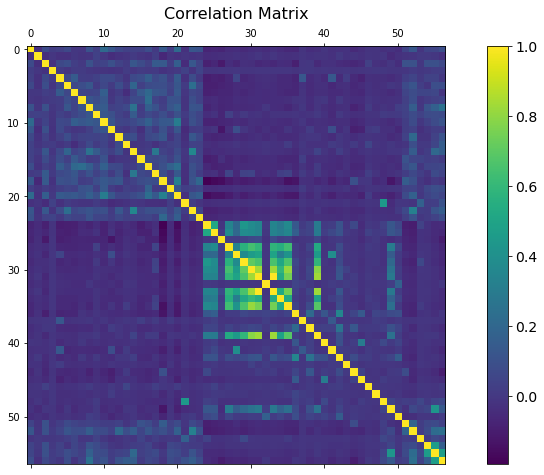

In [29]:
import matplotlib.pyplot as plt

f = plt.figure(figsize=(15, 7.5))
plt.matshow(X_train_df.corr(), fignum=f.number)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16);

#### As we can see from the correlation matrix nearly all the predictors are not correlated with each other except for the predictor no. 31 and 33, It appears that these 2 predictors are highly correlated, also there are some predictors in the middle that are somewhat correlated to each other, this will make it harder for the model to differentiate between the contribution of each of them thus could impact the overall performance, The regularization like L1 will remove one of the highly correlated weights but just to make sure i will eliminate one of the two terms that are highly correlated

##### Remove the extra highly correlated feature

In [30]:
corr = X_train_df.corr()

columns = np.full((corr.shape[0],), True, dtype=bool)
for i in range(corr.shape[0]):
    for j in range(i+1, corr.shape[0]):
        if corr.iloc[i,j] >= 0.9:
            print(i,j)
            if columns[j]:
                print(j)
                dropped_frame = j
                columns[j] = False
                
#Drope the feature from the training data                
selected_columns = X_train_df.columns[columns]
X_train_df_filtered = X_train_df[selected_columns]
X_train_df_raw.drop('word_freq_415', axis=1, inplace = True)

#Drop the feature from the Test data as well
X_test_df = pd.DataFrame(X_test)
X_test2 = X_test_df.drop( dropped_frame, axis=1)

31 33
33


##### The new Correlation Matrix

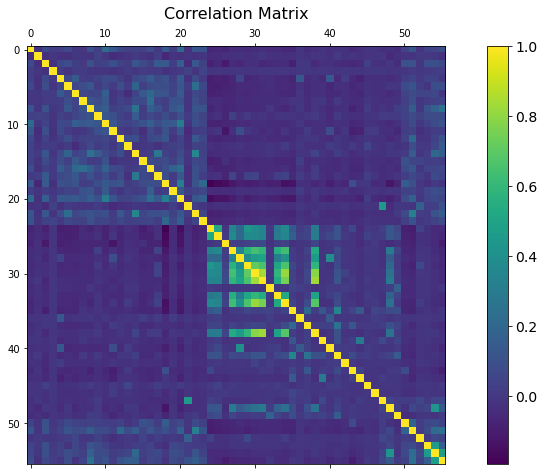

In [31]:
f = plt.figure(figsize=(15, 7.5))
plt.matshow(X_train_df_filtered.corr(), fignum=f.number)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16);

Transform the dataframe to array

In [32]:
X_train_filtered  = np.array(X_train_df_filtered )
X_train_filtered

array([[ 0.        ,  0.        ,  0.        , ..., -0.26013953,
         0.18918919, -0.01265823],
       [ 0.        ,  0.        ,  1.02325581, ...,  0.23743644,
         0.10810811,  0.15189873],
       [ 0.        ,  0.        ,  0.46511628, ...,  0.15371881,
        -0.13513514,  0.70042194],
       ...,
       [ 0.07      ,  0.        ,  0.1627907 , ...,  0.34149225,
         1.21621622,  2.93670886],
       [ 0.33      ,  0.67      ,  0.        , ..., -0.51129242,
        -0.24324324, -0.15189873],
       [ 0.        ,  0.        ,  0.        , ..., -0.04020338,
        -0.10810811, -0.21518987]])

#### $6^{th}$ Using gridsearch to find the best hyper parameters for the logistic regression model

In [33]:
# Regularization strength
alphas = np.logspace(-4,4,20)

#penalties
penalty = ['l1', 'l2']

#Solvers
solvers = ['liblinear', 'lbfgs']

Make the parameter grid and the Grid search object

In [34]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression()

param_grid = [{'penalty':penalty, 'solver':solvers, 'C':alphas}]

#GridSearch
reg_gridSearch = GridSearchCV(clf, param_grid, cv=10)
reg_gridSearch

GridSearchCV(cv=10, estimator=LogisticRegression(),
             param_grid=[{'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                          'penalty': ['l1', 'l2'],
                          'solver': ['liblinear', 'lbfgs']}])

Fit the Gridsearch object to the data

In [35]:
reg_gridSearch.fit(X_train_filtered, y_train)

GridSearchCV(cv=10, estimator=LogisticRegression(),
             param_grid=[{'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                          'penalty': ['l1', 'l2'],
                          'solver': ['liblinear', 'lbfgs']}])

#### $7^{th}$ Print the best Hyper Parameters

In [36]:
print(reg_gridSearch.best_params_, reg_gridSearch.best_score_)

{'C': 1438.44988828766, 'penalty': 'l2', 'solver': 'lbfgs'} 0.9266304347826086


#### Make a classifier with the best Parameters

In [37]:
best_c = reg_gridSearch.best_params_['C']
best_pen = reg_gridSearch.best_params_['penalty']
best_solver = reg_gridSearch.best_params_['solver']

clf = LogisticRegression(solver = best_solver, C = best_c, penalty = best_pen)
clf.fit(X_train_filtered, y_train)

LogisticRegression(C=1438.44988828766)

##### Predict the classes

In [38]:
y_pred = clf.predict(X_test2)

####  $ 8^{th} $ Evaluate the model

In [39]:
print('Testing accuracy = {}'.format(metrics.accuracy_score(y_test, y_pred)))
print('Testing precision = {}'.format(metrics.precision_score(y_test, y_pred)))
print('Testing recall = {}'.format(metrics.recall_score(y_test, y_pred)))

Testing accuracy = 0.9305103148751357
Testing precision = 0.9283667621776505
Testing recall = 0.8925619834710744


#### Print the confusion matrix

In [40]:
from sklearn.metrics import confusion_matrix
print('Confusion Matrix:\n', confusion_matrix(y_test, y_pred), '\n')

Confusion Matrix:
 [[533  25]
 [ 39 324]] 



#### $ 9^{th} $ Which is the appropriate metric for this problem ?

##### Precision will be the best metric because we don't want any false positives
##### Because basically a mail that is classified as a spam when its not is very undesirable 
##### Especially if it contained a job offer or something important 

#### $ 10^{th} $ Print the 5 most and 5 least Influencing features

In [41]:
sorted_coeff = np.sort(abs(clf.coef_[0]))
sorted_coeff

array([0.0089962 , 0.01111085, 0.01120437, 0.02275305, 0.04462551,
       0.0656027 , 0.08599328, 0.09028703, 0.09509594, 0.10539801,
       0.11154065, 0.14384403, 0.15845681, 0.15996992, 0.17049913,
       0.18950741, 0.19626277, 0.20609702, 0.22217578, 0.24918283,
       0.29093754, 0.29421603, 0.299585  , 0.31742022, 0.33571656,
       0.36946905, 0.37963823, 0.43401426, 0.45125336, 0.65626625,
       0.68401064, 0.68702026, 0.73347962, 0.89456363, 0.9368478 ,
       1.07750676, 1.09645288, 1.22241702, 1.44181711, 1.51946953,
       1.74332987, 1.88138959, 2.09938096, 2.14440478, 2.15355565,
       2.16195676, 2.20679326, 2.286678  , 2.36904176, 2.46393585,
       2.61809361, 2.833637  , 2.84991402, 2.92782951, 3.23984244,
       7.46987979])

In [42]:
indeces_large = []
indeces_small = []
for i in range(5):
    indeces_small.append(np.where( abs(clf.coef_[0]) == sorted_coeff[i]))
    indeces_large.append(np.where( abs(clf.coef_[0]) == sorted_coeff[55-i]))
    print("Largest influencing parameters: ", X_train_df_raw.columns[indeces_large[i][0][0]])
for i in range(5):
    print("Smallest influencing parameters: ", X_train_df_raw.columns[indeces_small[i][0][0]])

Largest influencing parameters:  word_freq_george
Largest influencing parameters:  word_freq_cs
Largest influencing parameters:  word_freq_conference
Largest influencing parameters:  char_freq_#
Largest influencing parameters:  word_freq_project
Smallest influencing parameters:  capital_run_length_average
Smallest influencing parameters:  word_freq_1999
Smallest influencing parameters:  word_freq_people
Smallest influencing parameters:  word_freq_mail
Smallest influencing parameters:  char_freq_(
